<h1> *********************************** Time Series Components **************************************** </h1>

<h2> Trend </h2> : long term direction 
<h2> seasonality </h2>: periodic behaviour 
<h2> Residual </h2>: irregular fluctuations 

 ** models performs better if we can first remove known sources of variation (like trend and seasonality)
 ** residual is what is left once trend & seasonality is removed 

<h2> decomposition </h2> (allows removal of deterministic components, that would otherwise complicate modelling)

<h2> additive decomposition</h2> (assumption => series = sum of (trend,seasonality,residual) )
 use additive modeling, when seasonal and residual values are independent of trend 
 ie increasing trend does not impact seasonal or residual ranges 
 season and residual component (not value), is centered around 0 

<h2> multiplicative decomposition </h2> (assumption => series = product of (trend,seasonality,residual) )
 this can be converted to additive decomp by using log that results in = sum of (trend,seasonality,residual)
 used when magnitude of seasonal and residual values varies with trend 
 season and residual component (not value), is centered around 1 


<h2> pseudo-additive decomposition </h2>
 combines the above two 
 used when data points are close to zero 


<h2> how to decompose </h2>
** single, double or triple exponential smoothing to find out trend/seasonality and subtracting it from orignal data 
** LOESS locally estimated scatterplot smoothing (can only handly additive decomposition)
** frequency based methods 



<h2> Imports </h2>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from statsmodels.graphics.tsaplots import plot_acf 
from statsmodels.tsa.seasonal import seasonal_decompose

<h2> get data </h2>

In [9]:
data_a = pd.DataFrame(np.load('week_1b_data/dataset_A.npy'))
data_b = pd.DataFrame(np.load('week_1b_data/dataset_B.npy'))

<AxesSubplot:title={'center':'B - Additive'}>

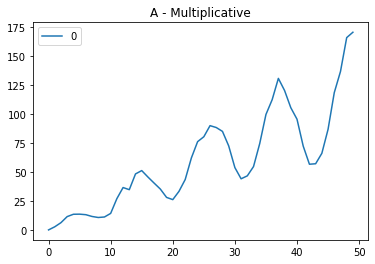

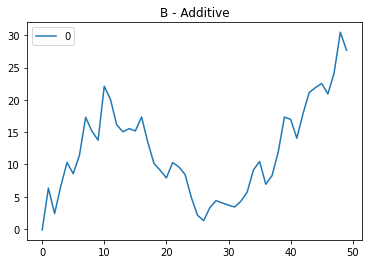

In [12]:
data_a.plot(title='A - Multiplicative')
data_b.plot(title='B - Additive')

<h2> Decomposition </h2>

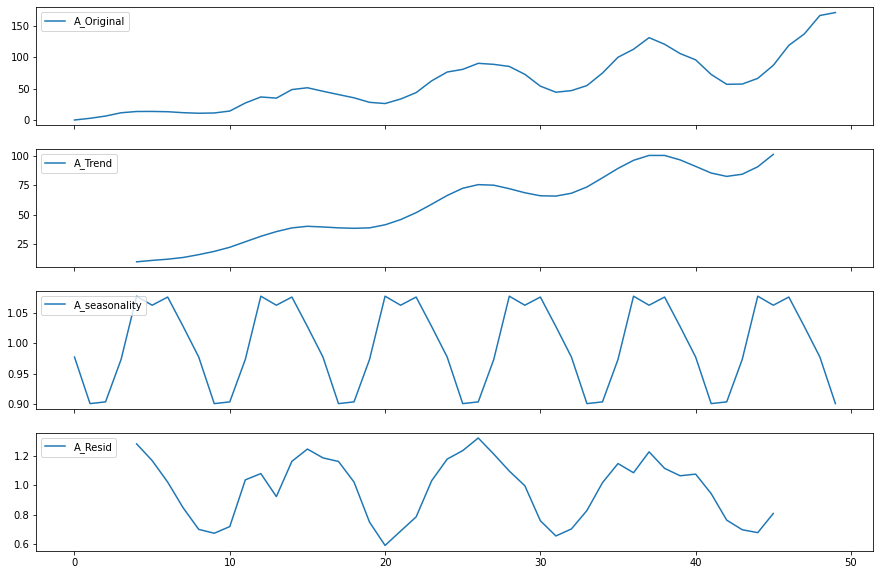

In [23]:
data_a_decom_mul=seasonal_decompose(x=data_a,model='multiplicative',period=8)
data_a_trend=data_a_decom_mul.trend
data_a_seasonal=data_a_decom_mul.seasonal
data_a_resid=data_a_decom_mul.resid

fig,ax=plt.subplots(4,1,sharex=True,sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

ax[0].plot(data_a,label='A_Original')
ax[0].legend(loc='upper left')


ax[1].plot(data_a_trend,label='A_Trend')
ax[1].legend(loc='upper left')

ax[2].plot(data_a_seasonal,label='A_seasonality')
ax[2].legend(loc='upper left')

ax[3].plot(data_a_resid,label='A_Resid')
ax[3].legend(loc='upper left')



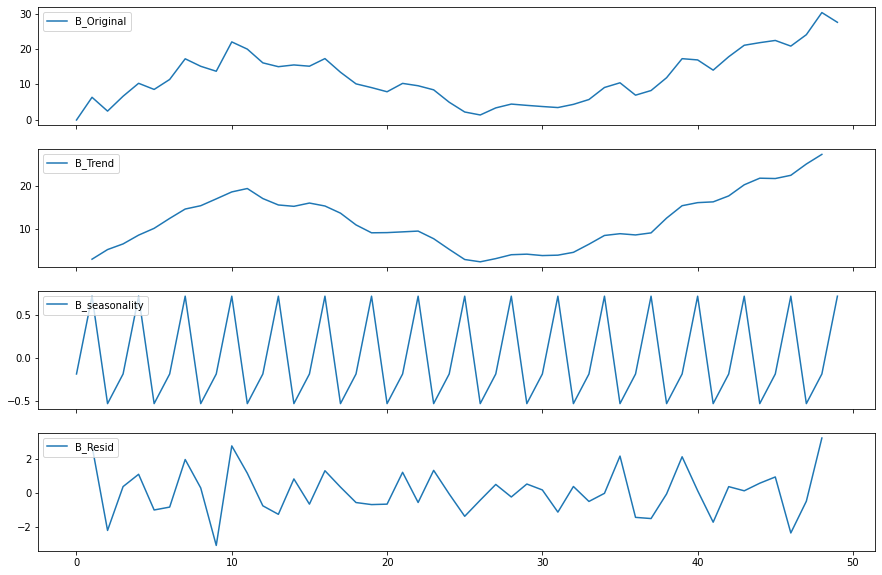

In [24]:
data_decom_mul=seasonal_decompose(x=data_b,model='additive',period=3)
data_trend=data_decom_mul.trend
data_seasonal=data_decom_mul.seasonal
data_resid=data_decom_mul.resid

fig,ax=plt.subplots(4,1,sharex=True,sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

ax[0].plot(data_b,label='B_Original')
ax[0].legend(loc='upper left')


ax[1].plot(data_trend,label='B_Trend')
ax[1].legend(loc='upper left')

ax[2].plot(data_seasonal,label='B_seasonality')
ax[2].legend(loc='upper left')

ax[3].plot(data_resid,label='B_Resid')
ax[3].legend(loc='upper left')



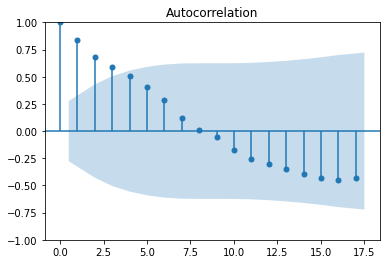

In [26]:
plot_acf(data_b);

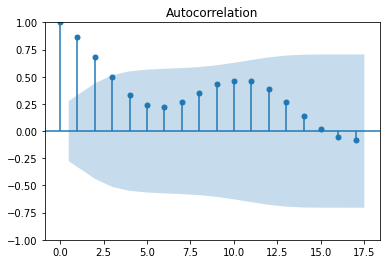

In [27]:
plot_acf(data_a);